## Análisis Exploratorio del dataset final

## Proyecto:  <span style="color:green"> Recarga Telefónica  </span>
### Versión de Python

In [1]:
from platform import python_version
print('La versión de python utilizada ha sido '+str(python_version()))

La versión de python utilizada ha sido 3.7.6


### Importación de librerias

In [2]:
import warnings
warnings.filterwarnings("ignore")

Instalaciones:

- En caso de necesitar instalar la librería `missingno` ejecutar el comando `pip install missingno` en una terminal del host donde se esté ejecutando el presente archivo

- En caso de necesitar instalar la librería `pandas_profiling` ejecutar el comando `pip install pandas_profiling` en una terminal del host donde se esté ejecutando el presente archivo

In [3]:
%matplotlib inline
import pandas as pd # version 0.25.1 
import numpy as np  # version 1.17.2 
import matplotlib.pyplot as plt # version 3.1.1
import seaborn as sns # version 0.9.0
import pickle # version 4.0
import missingno as msngo # version 0.4.2
#from pandas_profiling import ProfileReport # version 2.8.0

Importación de archivo con funciones auxiliares

In [4]:
import ancilliary_funtions as afx

Se procede a establecer las configuraciones de visualización del dataframe:

- Mostrar todas las columnas

In [5]:
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)

* Cambiar el formato de los números en la librería Pandas

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Análisis exploratorio

#### Importar la base de datos

In [7]:
df = pd.read_csv('df_user.csv', encoding="utf8").drop(columns='Unnamed: 0')

#### Se realiza una visualización de una muestra de los datos

In [8]:
df.head()

user_id  ProximaCompra  Recency  Frequency  Revenue  DayDiff  DayDiff2  DayDiff3  DayDiffMean  DayDiffStd  NextPurchaseDayRange
0  6hGr+RATbAd4+lllpCnA9A==          21.00       24         67    24870    25.00     42.00     49.00        12.37       17.78                     0
1  t3EOZ7yv2GHocshGL/xOZw==          26.00        8         11    18700   106.00    134.00    150.00        36.36       34.20                     0
2  G3vkWF99pIxFqC+BGKtb5g==          10.00       84         11    30700     5.00     32.00     63.00        39.60       40.04                     1
3  9nDQxDC6XnGc0Pn3kX+jsg==          21.00       29          7    11766    16.00    114.00    167.00        45.50       39.21                     0
4  II1jDnsRhmLJj/qFvevbZA==          21.00       15         51    43250    56.00     71.00     82.00         9.96       11.48                     0

#### Se procede a evaluar la cantidad de filas y columnas del conjunto de datos

In [9]:
print('El dataset se encuentra compuesto por {} filas y {} columnas'.format(df.shape[0],df.shape[1])) 

El dataset se encuentra compuesto por 974684 filas y 11 columnas


#### Se realiza a continuación una revisión de los tipos de datos.  
* Podemos observar que las variables, aparte del id, están todas con un tipo de datos numérico. Esto está dado por el procesamiento en la creación  del dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974684 entries, 0 to 974683
Data columns (total 11 columns):
user_id                 974684 non-null object
ProximaCompra           974684 non-null float64
Recency                 974684 non-null int64
Frequency               974684 non-null int64
Revenue                 974684 non-null int64
DayDiff                 974684 non-null float64
DayDiff2                974684 non-null float64
DayDiff3                974684 non-null float64
DayDiffMean             974684 non-null float64
DayDiffStd              974684 non-null float64
NextPurchaseDayRange    974684 non-null int64
dtypes: float64(6), int64(4), object(1)
memory usage: 81.8+ MB


### Inspección de las variables
En el conjunto de datos tenemos las siguientes variables:
* **user_id**: Identificación del usuario (correo ofuscado)
* **ProximaCompra**: Diferencia de días entre la última transacción y la primera, con respecto a la fecha de corte
* **Recency**: Días desde la última recarga, con respecto a la fecha de corte
* **Frequency**: Total de transacciones del usuario, previos a la fecha de corte
* **Revenue**: Total de dinero de las transacciones del usuario
* **DayDiff**: Diferencia de días de la última transacción con la penúltima, antes de la fecha de corte
* **DayDiff2**: Diferencia de días de la penúltima transacción con la ante-penúltima, antes de la fecha de corte
* **DayDiff3**: Diferencia de días de la ante-penúltima transacción con la ante-ante-penúltima, antes de la fecha de corte
* **DayDiffMean**: Media de la diferencia de días entre todas las transacciones del usuario
* **DayDiffStd**: Desviación estándar de la diferencia de días entre todas las transacciones del usuario
* **NextPurchaseDayRange**: Vector objetivo, que divide la próxima compra en tres clases


#### Se realiza una inspección gráfica de los valores nulos

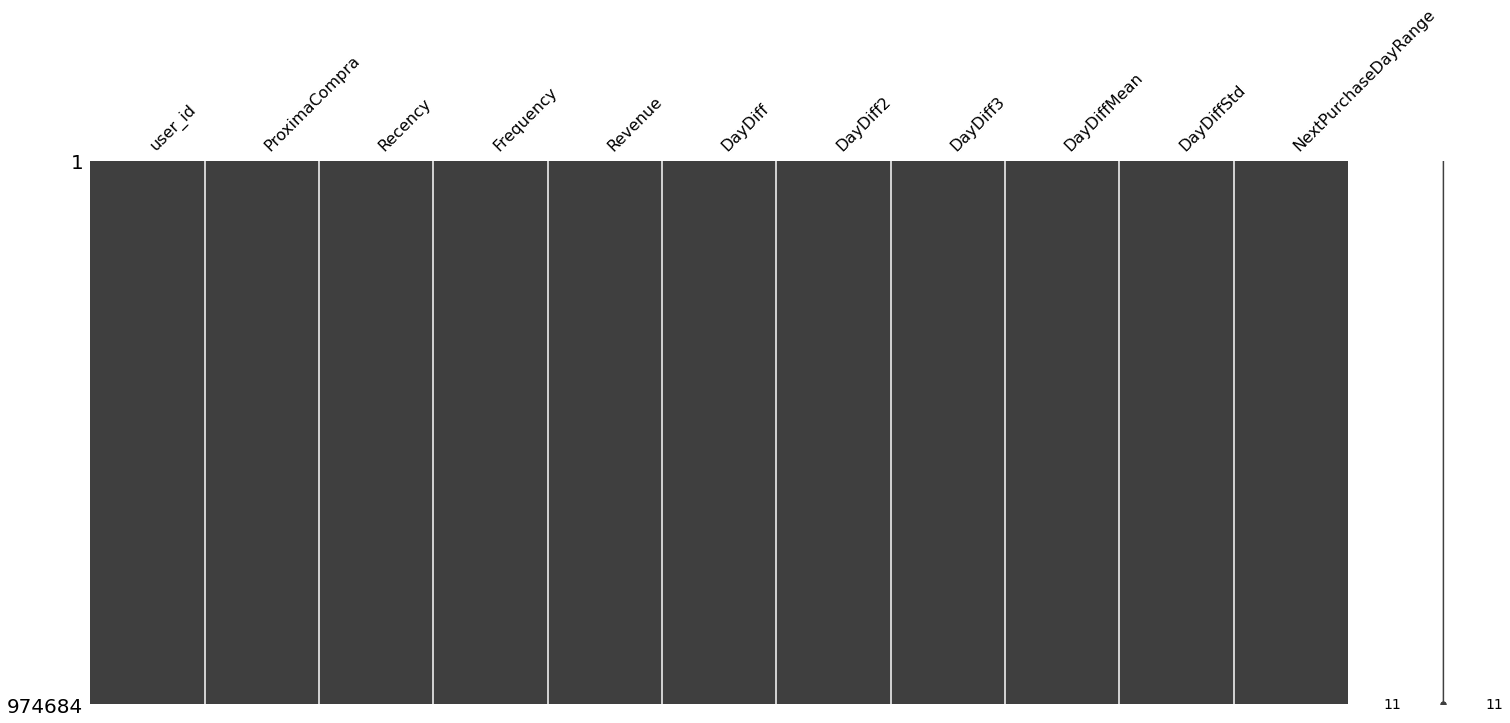

In [11]:
msngo.matrix(df);

#### A continuación se detalla una inspección preliminar de cada una de las variables existentes

In [12]:
afx.analizar_variables(df);

Variables numéricas


ProximaCompra   Recency  Frequency     Revenue   DayDiff  DayDiff2  DayDiff3  DayDiffMean  DayDiffStd  NextPurchaseDayRange
count      974684.00 974684.00  974684.00   974684.00 974684.00 974684.00 974684.00    974684.00   974684.00             974684.00
mean           19.98    189.70       4.38    16199.12     43.08     58.86     70.50        31.03       40.05                  0.08
std             4.19    146.14      21.06    39420.37     66.18     67.97     65.39        31.45       38.65                  0.27
min             0.00      0.00       1.00      100.00      1.00      2.00      3.00         1.03        0.00                  0.00
25%            21.00     58.00       1.00     3000.00     15.00     32.00     47.00        15.00       28.99                  0.00
50%            21.00    161.00       2.00     6000.00     15.00     32.00     47.00        15.00       30.60                  0.00
75%            21.00    309.00       4.00    15000.00     37.00     41.00     47.00        35.30       32.36                  0.00
max            30.00    485.00   17760.00 12926734.00    484.00    485.00    485.00       249.50      331.63                  1.00


--------------------------------------------------------------------------------

Variables no numéricas


user_id
count                     974684
unique                    974684
top     C7Fn6xyUKgb9hnD71VFgPg==
freq                           1

user_id    %
C7Fn6xyUKgb9hnD71VFgPg==        1 0.00
/O+1mL+IlTQPLr0vY0950g==        1 0.00
lpsXhYgjS6EPn3QNFRA5eQ==        1 0.00
ZjvCC7b9YNeNoYLh4PtRSA==        1 0.00
uYXD0ZdyfBJCjEOLJwBZUQ==        1 0.00
...                           ...  ...
XMe3VlrTjUnawr62xXSAdg==        1 0.00
rZybPaKMR4uThQ+i7Kt3aA==        1 0.00
rb8yR9sqDL74J788bguh8w==        1 0.00
Tg0O3SjfFn/7FrawcLvgcw==        1 0.00
pNbN1I07FU3EJiUZtqYqpw==        1 0.00

[974684 rows x 2 columns]


--------------------------------------------------------------------------------

Cantidad de valores nulos


user_id                 0
ProximaCompra           0
Recency                 0
Frequency               0
Revenue                 0
DayDiff                 0
DayDiff2                0
DayDiff3                0
DayDiffMean             0
DayDiffStd              0
NextPurchaseDayRange    0
dtype: int64

**Conentarios**
* No se aprecian datos nulos. Esto se debe a que ya fueron tratados al momento de crear el dataset.
* **user_id** tiene valores únicos. Solo se necesita para entregar el resultado. No se utilizará en el entrenamiento de los modelos.


**Inspección Gráfica de las variables**

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

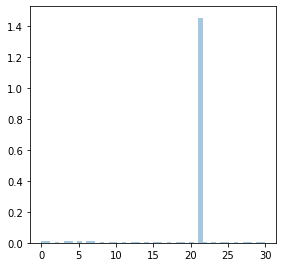

In [13]:
afx.inspeccion_visual(df.drop('user_id', axis=1));

**Comentarios**
* Las distribuciones de las variables están todas concentradas hacia la izquierda. Esto significa que la mayoría de las transacciones tienen valores más bajos.
* **ProximaCompra** la mayoría de los valores están por debajo de la mediana de 34 días, lo que es bueno, porque se quiere que el usuario se tome la menor cantidad posible de días en su siguiente compra. 
* Para **DayDiff**, **DayDiff2**, **DayDiff3** las medianas correspondientes son 20, 49 y 70 días.
* **DayDiffMean** la mediana es de 30 días, lo que quiere decir lo más común es que los usuarios vuelven a comprar alrededor de 30 días.
* Cabe destacar el caso de la variable **Frequency** en donde hay valores mucho más altos (outliers), que se escapan al grupo y distorsionan la distribución. Estos casos no son errores en los datos, son usuarios que han realizado muchas transacciones en el tiempo analizado, lo que es algo deseable. La mediana está en 11 veces, que corresponde a que el usuario ha realizado esa cantidad de transacciones en los 17 meses del estudio. El valor más alto está en 17700, que en promedio serían más de 30 transacciones diarias! 
* También se aprecia en la variable **Revenue**, que hay casos que han gastado valores mucho mayores que el resto. Tenemos que la mediana está en 37 mil pesos, el mayor valor es de más de 12 millones. Se prefiere mantener estos datos, porque son casos que se desea detectar.
* El vector objetivo **NextPurchaseDayRange** está un poco desbalanceado. La clase más importante, la que se quiere predecir, es la 2 que corresponde al 21% de los registros.

In [14]:
df['NextPurchaseDayRange'].value_counts('%')

0   0.92
1   0.08
Name: NextPurchaseDayRange, dtype: float64

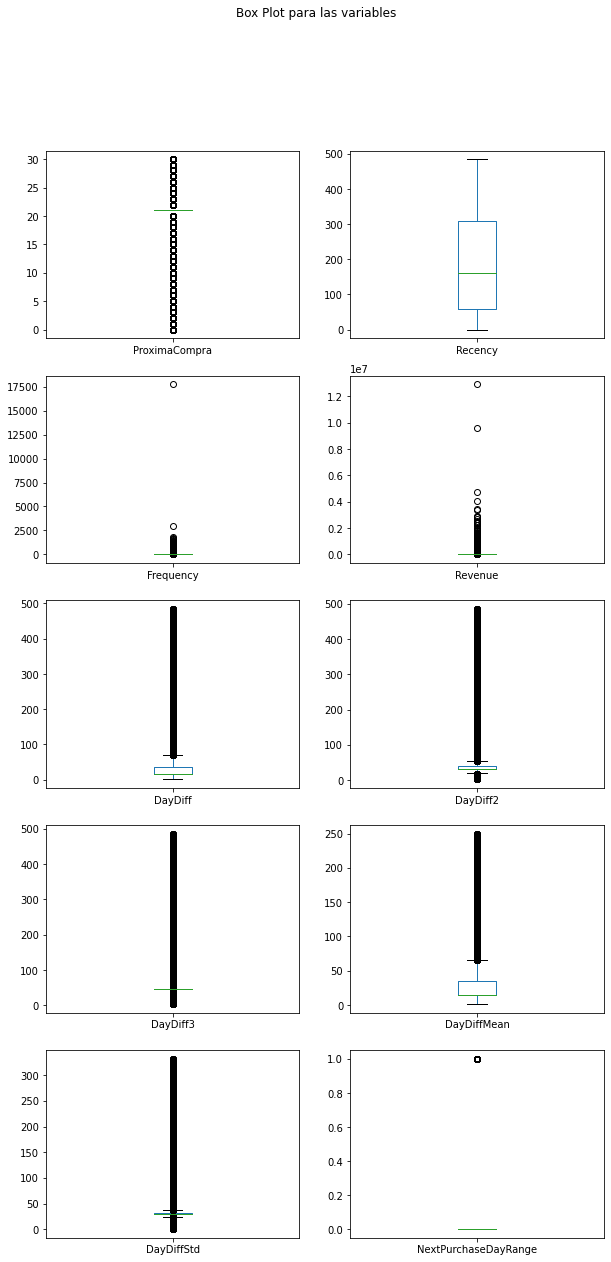

In [15]:
df.drop('user_id', axis=1).plot(kind='box', 
                                subplots=True, 
                                layout=(5,2), 
                                sharex=False, 
                                sharey=False, 
                                figsize=(10,20), 
                                title='Box Plot para las variables')
plt.savefig('user_box')
plt.show()

* Se quiere observar con mayor detenimiento el comportamiento de las variables 'Recency', 'Frequency' y 'Revenue'.

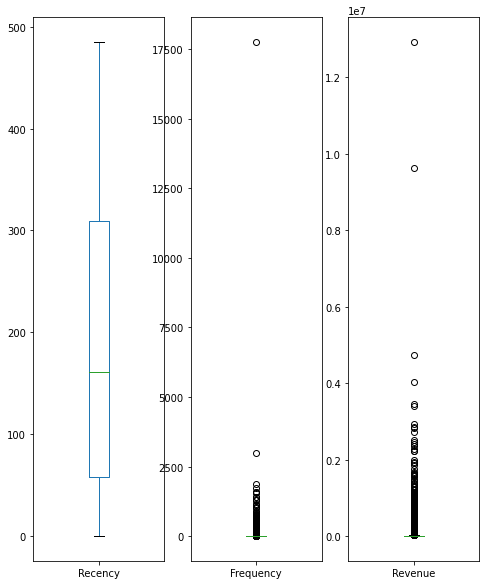

In [18]:
df[['Recency', 'Frequency', 'Revenue']].plot(kind='box', 
                                subplots=True, 
                                layout=(1,3), 
                                sharex=False, 
                                sharey=False, 
                                figsize=(8,10) );

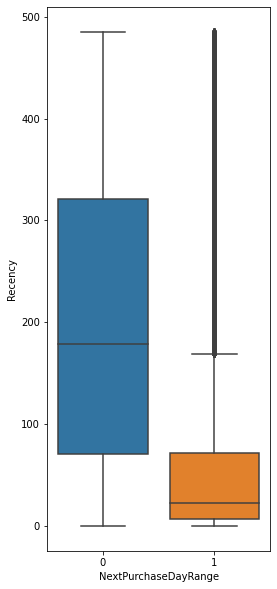

In [19]:
plt.figure(figsize=(4,10))
sns.boxplot(x='NextPurchaseDayRange', y='Recency', data=df, orient="v")

* Se filtran los datos de la variable Frequency, con el objetivo de poder observar si hay diferencias en las 3 clases de NextPurchaseDayRange.

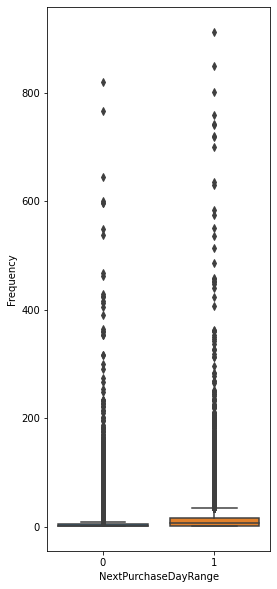

In [20]:
plt.figure(figsize=(4,10))
sns.boxplot(x='NextPurchaseDayRange', y='Frequency', data=df[df['Frequency'] < 1000], orient="v")

* Se filtran los datos de la variable Revenue, con el objetivo de poder observar si hay diferencias en las 3 clases de NextPurchaseDayRange.

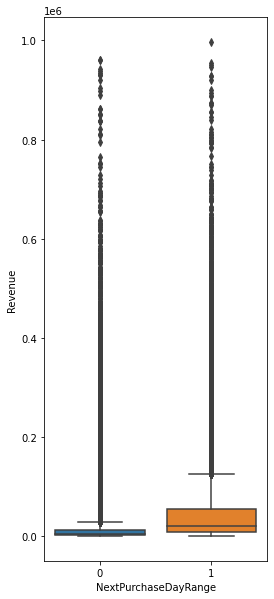

In [21]:
plt.figure(figsize=(4,10))
sns.boxplot(x='NextPurchaseDayRange', y='Revenue', data=df[df['Revenue'] < 1000000], orient="v")

**Comentarios**
* Los outliers más destacados son de las variable **Frequency**, en donde se aprecian por sobre los 1500 transacciones a 5 casos. Con 17734 transacciones y lo siguen 2975. El primero significa que en promedio han realizado más de 30 transacciones diarias. Una observación al dataset original, nos revela que tiene varios días con más de 100 transacciones.
* El primer usuario, también se repite en los outliers de la variable **Revenue**, con más de 12.9 millones de pesos en total del período analizado.
* En **Revenue**, tenemos 4 usuarios con más de 4 millones de pesos gastados.
* Al ver la distribución de **Frequency** cruzado con 'NextPurchaseDayRange', podemos apreciar que solo la clase 0 tiene outliers. Esto es porque las clases 2 y 1 tienen un rango específico de días a considerar y la clase 0 es todo el resto. Además, es la que mejor se puede diferenciar las 3 clases.


In [ ]:
df[df['Frequency'] > 1500]

In [ ]:
df[df['Revenue'] > 4000000]

### Análisis de correlación

In [ ]:
plt.figure(figsize=(10, 10))
afx.heatmap_corr(df, annot=False)
plt.savefig('user_heatmap')

**Conentarios**
* Se aprecia una alta correlación positiva entre:
    * **Recency** y **ProximaCompra**. Esto tiene sentido, ya que las dos medidas están relacionadas. La primera es la cantidad de días desde la última compra, hasta la fecha de corte y la segunda es la cantidad de días hasta la primera compra después de la fecha de corte.
    * **Revenue** y **Frequency**, también están relacionadas positivamente: mientras más transacciones se registran, mayor es el monto gastado.
    * **DayDiff** - **DayDiff2** - **DayDiff3** - **DayDiffMean** - **DayDiffStd** y en ese orden. Esto tiene sentido, porque están construidas con la misma información de diferencia de días entre las compras. Se aprecia que mientras más distancia tienen en esta lista, la relación va disminuyendo. Ejemplo, DayDiff con DayDiff3 es más débil que DayDiff con DayDiff2. 
* Se aprecia una correlación negativa entre:
    * **ProximaCompra** y **NextPurchaseDayRange**, esto está dado por la forma en que se definió el vector objetivo: el valor 2 (el más alto) corresponde al menor período de tiempo de la próxima compra. Por lo tanto tienen una relación inversa.
    * Pasa lo mismo entre **Recency** y **NextPurchaseDayRange**, por la misma razón anterior.
* Se aprecia una correlación nula entre:
    * **ProximaCompra** y **DayDiffStd** no tiene correlación entre sí.